In [2]:
#RUN THIS BEFORE USING
%reset
%matplotlib inline
import network_modules as nm
import numpy as np
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


**Parameter initializations**

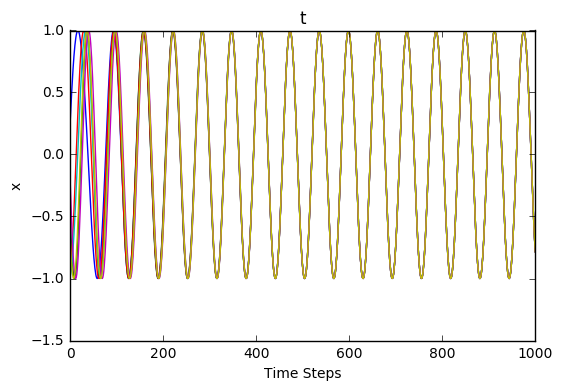

In [52]:
distributions = [(6,0,2*np.pi,'uniform')]
phase = nm.create_vec_states(distributions)
x = np.cos(phase) + np.sin(phase)*1j

G = nm.create_SCC() #Basic Graph

def h(x):   #node function
    w = 10
    return 1j * x * w + x*(1-abs(x)) # apply limit cycle term to keep in a circle

def f(x,y): #coupling function
    K = 1
    phi = np.angle(y[0])-np.angle(x[0])
    return 1j * x * complex(K*np.sin(phi),0)

M = np.identity(6) #Measurement Matrix

N = 1 #Noise Variance

#Initialize & Run model for t = 10 sec
po_model = nm.nmodel(G,x,h,f,dt=.01)
po_model.run(10)
nm.state_course(nm.reduce_state(0,po_model.x.real))

In [1]:
distributions = [(1,0,2*np.pi,'uniform')]
phase = nm.create_vec_states(distributions)
x = np.cos(phase) + np.sin(phase)*1j
y = 1 + 1j

G = nx.path_graph(1) #Basic Graph

def h(x):   #node function
    w = 10
    return 1j * x * w + x*(1-abs(x)) # apply limit cycle term to keep in a circle

def f(x,y): #coupling function
    K = 1
    phi = np.angle(y[0])-np.angle(x[0])
    return 1j * x * complex(K*np.sin(phi),0)

M = np.identity(6) #Measurement Matrix

N = 1 #Noise Variance

#Initialize & Run model for t = 10 sec
po_model = nm.nmodel(G,x,h,f,dt=.01)
po_model.run(10)
nm.state_course(nm.reduce_state(0,po_model.x.real))

NameError: name 'np' is not defined

In [110]:
#Linear Measurement

pos_dist = lambda X: np.sqrt(sum([x**2 for x in X]))
#position of graph nodes
node_pos = np.array([np.array([.5,1,0]),np.array([.5,-1,0]),
                     np.array([-.5,1,0]),np.array([-.5,-1,0]),np.array([1.5,0,0]),np.array([-1.5,0,0]),])

def pol2cart(r, z, phi):
    rho = np.sqrt(r**2 - z**2)
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return np.array([x, y, z])

#position of electrodes in 5 levels of the sphere
pos0 = np.array([pol2cart(2,0,phi) for phi in range(0,360,3)])
pos1 = np.array([pol2cart(2,.5,phi) for phi in range(0,360,5)])
pos2 = np.array([pol2cart(2,1,phi) for phi in range(0,360,8)])
pos3 = np.array([pol2cart(2,1.5,phi) for phi in range(0,360,20)])
pos4 = np.array([pol2cart(2,2,phi) for phi in range(0,360,360)])
pos = np.concatenate((pos0,pos1,pos2,pos3,pos4))

electrode_dis = np.array([np.array([p-node for p in pos]) for node in node_pos])
#plug M into nmodel object instatiation
M = np.array([[1/(pos_dist(elec)) for elec in node] for node in electrode_dis])

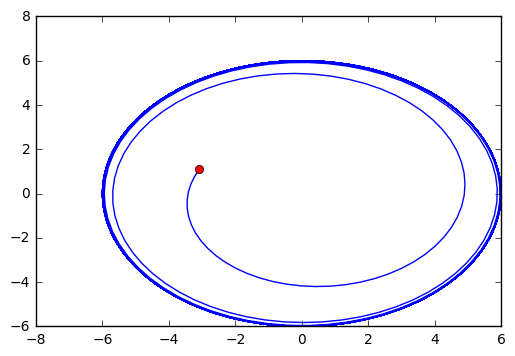

In [114]:
#Dimensional reduction to sum of states

z_sum = sum(nm.reduce_state(0,po_model.x))
fig = plt.figure()
plt.plot(z_sum.real.tolist()[0], z_sum.imag.tolist()[0])
plt.plot(z_sum.real.tolist()[0][0], z_sum.imag.tolist()[0][0] , 'ro')
plt.show()